In [2]:
#import libraries
import numpy as np
import pandas as pd
import geopandas as gpd
import fiona
import folium
import matplotlib.pyplot as plt

In [4]:
# Read in# Read in contract  csv file
contract_data = pd.read_csv("../IL_CEI/can-summer-2023/data/raw/contracts/illinois_bidbuy_contracts_as_of_20230614.csv")
# make the company name lower case
contract_data["Vendor"] = contract_data.Vendor.str.lower()
contract_data

,Contract / Blanket #,Bid Solicitation #,Description,Vendor,Type Code,Dollars Spent to Date,Organization,Status,Begin Date,End Date
0,CIB6354390,NaN,Prescription Drugs,"caremarkpcs health, l.l.c.",B,$0.00,CMS - Central Management Services,3PS - Sent,07/01/2015,06/30/2024
1,CIB5736630,NaN,ConnectYourCare - Flexible Spending,"connectyourcare, llc",A,$0.00,CMS - Central Management Services,3PS - Sent,07/01/2019,06/30/2023
2,23-563WCC-WCC56-P-39787,NaN,Sole Source- WCRI CompScope Reports 23,wcri,D,$0.00,WCC - Illinois Worker's Compensation Commission,3PS - Sent,08/15/2022,06/30/2023
3,23-563WCC-WCC56-P-38456,NaN,EDI Hosting and Maintenance FY 23,"ebix, inc.",C,$0.00,WCC - Illinois Worker's Compensation Commission,3PS - Sent,07/01/2022,06/30/2023
4,23-551HDA-LEGAL-P-39047,NaN,Foley & Lardner Bond Counsel (Exempt),foley & lardner llp,Z,$0.00,HDA - Housing Development Authority,3PS - Sent,07/07/2022,07/06/2024
...,...,...,...,...,...,...,...,...,...,...
1371,17-416CMS-BOSS4-P-99,NaN,JPMC PAPER AND ENVELOPES SMALL QTYS,midland paper,A,"$4,502,328.93",CMS - Central Management Services,3PS - Sent,03/06/2017,07/31/2023
1372,17-416CMS-BOSS4-P-39,NaN,MC Fleet Fuel Card Services,wex bank,B,"$279,800.00",CMS - Central Management Services,3PS - Sent,07/01/2016,06/30/2025
1373,14Z0879001,NaN,Pharmacy Benefits Management (PBMS),"change healthcare pharmacy solutions, inc.",B,$0.00,HFS - Healthcare and Family Services,3PS - Sent,03/17/2014,03/16/2024
1374,13Z1819001,NaN,HFS MMIS Upgrade Project Expert Services,cognizant technology solutions us corp,B,$0.00,HFS - Healthcare and Family Services,3PS - Sent,06/20/2013,06/19/2023


In [8]:
#To get the frequency by levels
contract_data["Organization"].value_counts()


Organization
CMS - Central Management Services                            809
DoIT - Department of Innovation and Technology               164
DHS - Human Services                                          80
DOT - Transportation                                          56
ISP - Illinois State Police                                   56
HDA - Housing Development Authority                           47
MIL - Military Affairs                                        44
DOC - Corrections                                             37
EPA - Environmental Protection Agency                         12
DPH - Public Health                                           11
CPOGS - CPO Office for General Services                       10
DNR - Natural Resources                                        8
DES - Employment Security                                      8
FPR - Department of Financial and Professional Regulation      7
EMA - Emergency Management Agency                              6
HFS - Health

In [6]:
#To get the total number of contracts
contract_data["Organization"].value_counts().sum()

# less than 1 percent will be plotted seperatedly and referred to as others
# other categories outside cms will be plotted

1376

In [7]:
#Group the organizations by total number of contracts
contract_data_bar = contract_data.groupby('Organization').count()[['Status']].reset_index()
contract_data_bar 

,Organization,Status
0,ALPLM - Abraham Lincoln Presidential Library a...,1
1,CEI - Commission on Equity and Inclusion,1
2,CFS - Children and Family Services,1
3,CMS - Central Management Services,809
4,CPOGS - CPO Office for General Services,10
5,DES - Employment Security,8
6,DHS - Human Services,80
7,DJJ - Department of Juvenile Justice,2
8,DNR - Natural Resources,8
9,DOC - Corrections,37


In [35]:
#CMS - Central Management Services 809 is 58.6 percent of the contracts
# We are creating a bar graph of the ~ 41 percent left
# The 1 percent of contracts will be represented on a different graph

contract_data_bar2 = contract_data_bar[contract_data_bar['Status'] < 809]
contract_data_bar2 = contract_data_bar2[contract_data_bar2['Status'] > 13]
#contract_data_bar2








In [36]:
#sort the values of the total 41%
contract_data_bar2.sort_values('Status', inplace= True)
contract_data_bar2

,Organization,Status
9,DOC - Corrections,37
22,MIL - Military Affairs,44
17,HDA - Housing Development Authority,47
10,DOT - Transportation,56
20,ISP - Illinois State Police,56
6,DHS - Human Services,80
12,DoIT - Department of Innovation and Technology,164


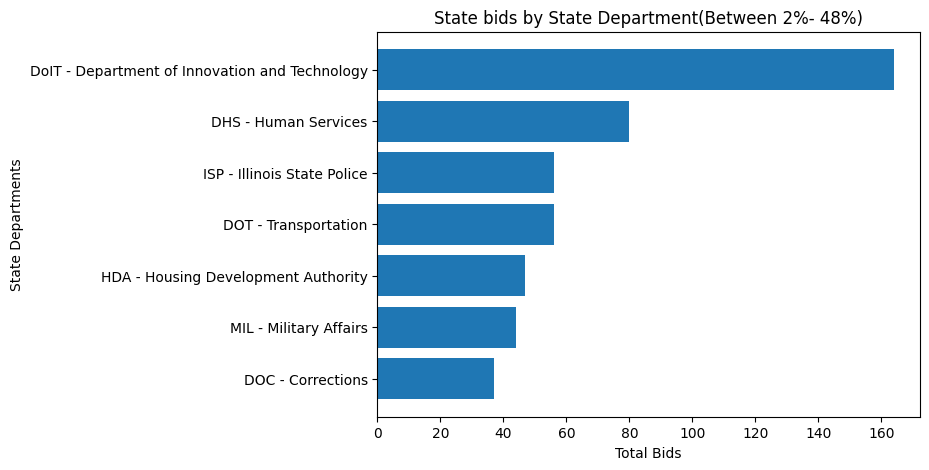

In [46]:
plt.figure(figsize=(7,5)) 
plt.barh(y = contract_data_bar2['Organization'], width= contract_data_bar2['Status'])
plt.xlabel('Total Bids')                      # x-label added
plt.ylabel('State Departments')          # y-label added
plt.title('State bids by State Department(Between 2%- 48%)')  # title added
plt.show()

In [24]:
# create a bar chart for the 1 percent
contract_data_bar3 = contract_data_bar[contract_data_bar['Status'] < 809]
contract_data_bar3 = contract_data_bar3[contract_data_bar3['Status'] < 13]
contract_data_bar3

,Organization,Status
0,ALPLM - Abraham Lincoln Presidential Library a...,1
1,CEI - Commission on Equity and Inclusion,1
2,CFS - Children and Family Services,1
4,CPOGS - CPO Office for General Services,10
5,DES - Employment Security,8
7,DJJ - Department of Juvenile Justice,2
8,DNR - Natural Resources,8
11,DPH - Public Health,11
13,EEC - Executive Ethics Commission,1
14,EMA - Emergency Management Agency,6


In [25]:
contract_data_bar3.sort_values('Status', inplace= True)
contract_data_bar3

,Organization,Status
0,ALPLM - Abraham Lincoln Presidential Library a...,1
1,CEI - Commission on Equity and Inclusion,1
2,CFS - Children and Family Services,1
24,SBE - State Board of Education,1
23,REV - Revenue,1
19,ICC - Illinois Commerce Commission,1
13,EEC - Executive Ethics Commission,1
25,THA - Toll Highway Authority,1
7,DJJ - Department of Juvenile Justice,2
21,LOT - Lottery,2


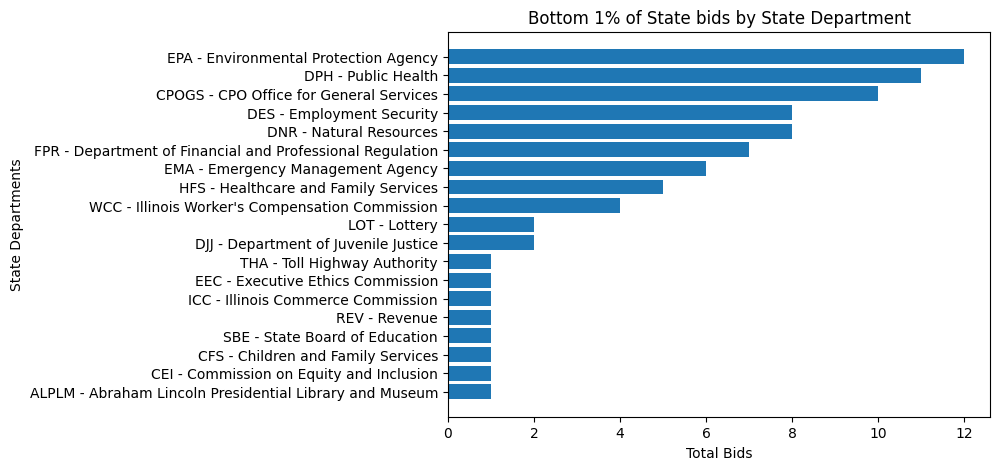

In [47]:
plt.figure(figsize=(7,5)) 
plt.barh(y = contract_data_bar3['Organization'], width= contract_data_bar3['Status'])
plt.xlabel('Total Bids')                      # x-label added
plt.ylabel('State Departments')          # y-label added
plt.title('Bottom 1% of State bids by State Department')  # title added
plt.show()